### HW 6-1 顯示資料集內容

In [1]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
# print("train data : ", len(x_train_image))
# print("test data : ", len(x_test_image))

y_train_label[100] = 5


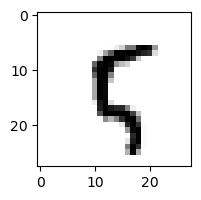

In [3]:
print(f"y_train_label[100] = {y_train_label[100]}")
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(x_train_image[100], cmap='binary')
plt.show()

y_test_label[20] = 9


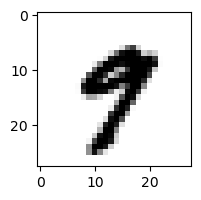

In [4]:
print(f"y_test_label[20] = {y_test_label[20]}")
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(x_test_image[20], cmap='binary')
plt.show()

### HW 6-2 資料預處理

In [5]:
X_train = x_train_image.reshape(60000, 28*28).astype('float32')
print("x_train_image shape : ", x_train_image.shape)
print("X_train       shape : ", X_train.shape)
X_test = x_test_image.reshape(10000, 28*28).astype('float32')
print("x_test_image  shape : ", x_test_image.shape)
print("X_test        shape : ", X_test.shape)
print("--------------------------------------------")
X_train_norm = X_train/255
X_test_norm = X_test/255
print("X_train_norm  shape : ", X_train_norm.shape)
print("X_test_norm  shape : ", X_test_norm.shape)

x_train_image shape :  (60000, 28, 28)
X_train       shape :  (60000, 784)
x_test_image  shape :  (10000, 28, 28)
X_test        shape :  (10000, 784)
--------------------------------------------
X_train_norm  shape :  (60000, 784)
X_test_norm  shape :  (10000, 784)


In [6]:
y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)
print(y_train_label[150])
print(y_train_OneHot[150])
print(y_test_label[150])
print(y_test_OneHot[150])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### HW 6-3 佈署類神經網路

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
myadel = Sequential()
myadel.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
myadel.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(myadel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


### HW 6-4 訓練類神經網路模型

In [9]:
myadel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
myadel.fit(x=X_train_norm, y=y_train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 4s - loss: 0.4426 - accuracy: 0.8812 - val_loss: 0.2235 - val_accuracy: 0.9366 - 4s/epoch - 19ms/step
Epoch 2/10
240/240 - 1s - loss: 0.1874 - accuracy: 0.9464 - val_loss: 0.1550 - val_accuracy: 0.9568 - 832ms/epoch - 3ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1331 - accuracy: 0.9620 - val_loss: 0.1286 - val_accuracy: 0.9627 - 876ms/epoch - 4ms/step
Epoch 4/10
240/240 - 1s - loss: 0.1018 - accuracy: 0.9711 - val_loss: 0.1098 - val_accuracy: 0.9686 - 801ms/epoch - 3ms/step
Epoch 5/10
240/240 - 1s - loss: 0.0812 - accuracy: 0.9769 - val_loss: 0.0974 - val_accuracy: 0.9703 - 803ms/epoch - 3ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0648 - accuracy: 0.9817 - val_loss: 0.0971 - val_accuracy: 0.9715 - 756ms/epoch - 3ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0542 - accuracy: 0.9848 - val_loss: 0.0851 - val_accuracy: 0.9738 - 811ms/epoch - 3ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0448 - accuracy: 0.9877 - val_loss: 0.0823 - val_accuracy: 0.9748 - 776ms/epoch - 3ms/step
Ep

### HW 6-5 訓練參數

In [10]:
scores = myadel.evaluate(X_test_norm, y_test_OneHot)
print(scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9792
0.979200005531311


### HW 6-5 訓練參數(調整)

In [11]:
# myadel = Sequential()
# myadel.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
# myadel.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
# myadel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# myadel.fit(x=X_train_norm, y=y_train_OneHot, validation_split=0.2, epochs=50, batch_size=200, verbose=0)
# scores = myadel.evaluate(X_test_norm, y_test_OneHot)
# print(scores[1])

In [12]:
myadel = Sequential()
myadel.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu6'))
myadel.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
myadel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
myadel.fit(x=X_train_norm, y=y_train_OneHot, validation_split=0.1, epochs=50, batch_size=100, verbose=0)
scores = myadel.evaluate(X_test_norm, y_test_OneHot)
print(scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9821
0.9821000099182129


### HW 6-6 儲存模型

In [13]:
myadel.save('my_myadel.h5')

### HW 6-7 自製圖片

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

(28, 28)


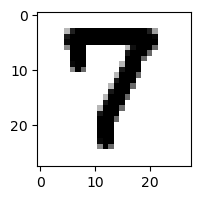

In [15]:
my_img = Image.open("my_sample_7.jpg")
resize_img = my_img.resize((28, 28))
img_array = np.array(resize_img.convert("L"))
print(img_array.shape)
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(img_array, cmap=plt.get_cmap('gray'))

### HW 6-8 預測自製圖片

In [16]:
from keras.models import load_model
model = load_model('my_myadel.h5')

(28, 28)
(1, 784)


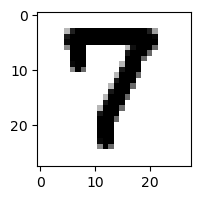

In [17]:
my_img = Image.open("my_sample_7.jpg")
resize_img = my_img.resize((28, 28))
img_array = np.array(resize_img.convert("L"))
print(img_array.shape)
# show image
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(img_array, cmap=plt.get_cmap('gray'))
# pre-processing
img_reshape = img_array.reshape(1, 28*28)
print(img_reshape.shape)
img_x = img_reshape.astype('float32')/255

In [18]:
# prediction = model.predict_classes(img_x)
# print("result = ", prediction)
# --- AttributeError: 'Sequential' object has no attribute 'predict_classes' ---
# keras 2.6 刪除 predict_classes

In [19]:
predict = model.predict(img_x)
prediction = np.argmax(predict,axis=1)
print(predict)
print("result = ", prediction)

1/1 [==============================] - 0s 113ms/step
[[1.2559011e-03 1.7117678e-16 9.0082484e-01 7.4331634e-14 8.7962835e-31
  8.9593746e-02 1.4204599e-04 8.1834802e-03 3.4156596e-19 8.6749035e-20]]
result =  [2]


### HW 7-CNN

#### 修正輸入資料格式

In [20]:
X_train = x_train_image.reshape((60000, 28, 28, 1)).astype('float32')
print("x_train_image shape : ", x_train_image.shape)
print("X_train       shape : ", X_train.shape)
X_test = x_test_image.reshape((10000, 28, 28, 1)).astype('float32')
print("x_test_image  shape : ", x_test_image.shape)
print("X_test        shape : ", X_test.shape)
print("--------------------------------------------")
X_train_norm = X_train/255
X_test_norm = X_test/255
print("X_train_norm  shape : ", X_train_norm.shape)
print("X_test_norm  shape : ", X_test_norm.shape)
# --------------------------------------------------
y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)

x_train_image shape :  (60000, 28, 28)
X_train       shape :  (60000, 28, 28, 1)
x_test_image  shape :  (10000, 28, 28)
X_test        shape :  (10000, 28, 28, 1)
--------------------------------------------
X_train_norm  shape :  (60000, 28, 28, 1)
X_test_norm  shape :  (10000, 28, 28, 1)


#### 建立模型/訓練

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
CNNmodel = Sequential()
CNNmodel.add(Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1))) # 28x28 grey
CNNmodel.add(MaxPooling2D((2, 2)))
CNNmodel.add(Conv2D(filters=36, kernel_size=(5, 5), padding='same', activation='relu'))
CNNmodel.add(MaxPooling2D((2, 2)))
CNNmodel.add(Flatten())
CNNmodel.add(Dropout(0.25))
CNNmodel.add(Dense(units=128, activation='relu'))
CNNmodel.add(Dropout(0.5)) # Dropout : 加速訓練 依輸出的期望值選擇部分Neuron停止運作
CNNmodel.add(Dense(units=10, activation='softmax'))

In [23]:
CNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNNmodel.fit(x=X_train_norm, y=y_train_OneHot, validation_split=0.1, epochs=50, batch_size=100, verbose=0)
scores = CNNmodel.evaluate(X_test_norm, y_test_OneHot)
print(scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9957
0.9957000017166138


In [24]:
CNNmodel.save('my_cnn_myadel.h5')

#### 預測自製圖片

In [25]:
from keras.models import load_model
model = load_model('my_cnn_myadel.h5')

(28, 28)
(1, 28, 28, 1)


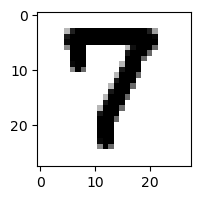

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

my_img = Image.open("my_sample_7.jpg")
resize_img = my_img.resize((28, 28))
img_array = np.array(resize_img.convert("L"))
print(img_array.shape)
# show image
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.imshow(img_array, cmap=plt.get_cmap('gray'))
# pre-processing
img_reshape = img_array.reshape((1, 28, 28, 1))
print(img_reshape.shape)
img_x = img_reshape.astype('float32')/255

In [27]:
predict = model.predict(img_x)
prediction = np.argmax(predict,axis=1)
print(predict)
print("result = ", prediction)

1/1 [==============================] - 0s 142ms/step
[[6.4843859e-11 4.2595410e-01 1.6434539e-08 2.5793397e-19 1.6919835e-04
  1.1734581e-11 6.0011788e-13 5.7387662e-01 1.4321076e-07 7.5532679e-13]]
result =  [7]
